In [2]:
#TABLA 1 ZOTENKO
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
    
#grafico de nodos
def graficar(archive):

    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()
    
    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    nx.draw(g,node_size = 40,with_labels=False, font_weight='bold')
    plt.show()

graficar('tc02Data/yeast_AP-MS.txt')    
graficar('tc02Data/yeast_LIT.txt')
graficar('tc02Data/yeast_Y2H.txt')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [3]:
#2) Tabla 1
def data_de_red(archive):

    RTA=[]
    data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])

    #Número de nodos
    N=g.number_of_nodes()

    #Número de enlaces
    L=g.number_of_edges()

    #Grado medio de la red
    k=[]
    for node in g.nodes:
        k.append(g.degree(node)) #El comando g.degree() calcula el grado como 
                                #si la red fuese no-dirigida
    km = sum(k)/len(k)  #valor medio de k  
    
    #Coeficiente de clustering

    Nodo_gnodo_vecino_gvecino_vecinossegundos=[] #Creo una lista con los nodos,  
    for nodo in g.nodes():                      #sus grados, sus vecinos, los 
        v=[]                                    #grados de sus vecinos y sus 
        for vecino in g.neighbors(nodo):        #vecinos segundos
            v2=[]
            for vecino2 in g.neighbors(vecino):
                v2.append(vecino2)
            gv=len(v2)
            v.append([vecino,gv,v2])
        gn=len(v)
        Nodo_gnodo_vecino_gvecino_vecinossegundos.append([nodo,gn,v])

    #Ahora calculo el <Ci>
    t=-1
    C=np.zeros(len(g.nodes()))

    #Calculo la cantidad de enlaces entre vecinos
    for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
        E = 0
        t=t+1
        for i in range(len(n[2])):
            for j in range(len(n[2])):
                for k in range(len(n[2][i][2])):
                    if n[2][i][2][k] == n[2][j][0]:
                        E = E + 1 #Cuento los enlaces entre vecinos del nodo n. 
                                  #Haciendo esto, se cuentan dos veces.

        if n[1] > 1: #Si el grado es menor o igual a 1, entonces el coeficiente 
                     #de clustering es nulo
            C[t]=E/(n[1]*(n[1]-1)) #Como es una red no dirigida, debería 
                                   #multiplicar por dos, pero ese factor esta 
                                   #contemplado en el numero de enlaces 
                                   #calculados dado que se repiten dos veces

    CPromedio=sum(C)/len(C)

    RTA.append([N, L, km, CPromedio])

    return RTA

AP = data_de_red('tc02Data/yeast_AP-MS.txt')
LIT = data_de_red('tc02Data/yeast_LIT.txt')
Y2H = data_de_red('tc02Data/yeast_Y2H.txt')
LIT_REGULY = data_de_red('tc02Data/yeast_LIT_Reguly.txt')

#TABLA
tabla_red = pd.DataFrame ({"Redes":["AP_MS","LIT","Y2H","LIT_Reguly"],
                           "Numero de Nodos":[AP[0][0],LIT[0][0],Y2H[0][0],LIT_REGULY[0][0]],
                           "Numero de Enlaces":[AP[0][1],LIT[0][1],Y2H[0][1],LIT_REGULY[0][1]],
                           "Grado Medio":[AP[0][2],LIT[0][2],Y2H[0][2],LIT_REGULY[0][2]],
                           "<Ci>":[AP[0][3],LIT[0][3],Y2H[0][3],LIT_REGULY[0][3]]})
print (tabla_red)

        Redes  Numero de Nodos  Numero de Enlaces  Grado Medio      <Ci>
0       AP_MS             1622               9070    11.183724  0.554636
1         LIT             1536               2925     3.808594  0.339892
2         Y2H             2018               2930     2.903865  0.153985
3  LIT_Reguly            12222              11859     1.940599  0.104464


In [4]:
#TABLA 2 ZOTENKO
#Creo una funcion que agarre los enlaces de cada nodo y los compare con las otras redes
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')
LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])
#print(LIT_REGULYYY)

In [104]:
#2) Tabla2
def invertir(lista):
    rlista=[]
    for i in range(len(lista)):
        rlista.append(lista[len(lista)-1-i])
    return rlista

APP = ldata ('tc02Data/yeast_AP-MS.txt')
LITT = ldata ('tc02Data/yeast_LIT.txt')
Y2HH = ldata ('tc02Data/yeast_Y2H.txt')
LIT_REGULYY = ldata ('tc02Data/yeast_LIT_Reguly.txt')

LIT_REGULYYY = []
for i in range(1,len(LIT_REGULYY)):
    LIT_REGULYYY.append([LIT_REGULYY[i][0],LIT_REGULYY[i][1]])


def overlap(data1,data2,data3,data4):
    datas = [data1,data2,data3,data4]
    overlap_list = []
    for i in range(len(datas)):
        i_list=[]
        for j in range(i+1,len(datas)):
            count = 0
            for l in range (len(datas[i])):
                if datas[i][l] in datas[j]:
                    count = count + 1
                else:
                    invert = invertir(datas[i][l])
                    if invert in datas[j]:
                        count = count + 1
            i_list.append(count)
        overlap_list.append(i_list)
    return overlap_list


overlap_list = overlap(APP,LITT,Y2HH,LIT_REGULYYY)


In [105]:
#TABLA
tabla_red = pd.DataFrame ({"-":["AP_MS",overlap_list[0][0]/AP[0][1],overlap_list[0][1]/AP[0][1],overlap_list[0][2]/AP[0][1]],
                           "--":[overlap_list[0][0]/LIT[0][1],"LIT",overlap_list[1][0]/LIT[0][1],overlap_list[1][1]/LIT[0][1]],
                           "---":[overlap_list[0][1]/Y2H[0][1],overlap_list[1][0]/Y2H[0][1],"Y2H",overlap_list[2][0]/Y2H[0][1]],
                           "----":[overlap_list[0][2]/LIT_REGULY[0][1],overlap_list[1][1]/LIT_REGULY[0][1],overlap_list[2][0]/LIT_REGULY[0][1],"LIT_Reguly"]})
print (tabla_red)



           -         --        ---        ----
0      AP_MS   0.443761  0.0887372    0.212497
1   0.143109        LIT  0.0887372    0.241167
2  0.0286659  0.0888889        Y2H   0.0403913
3   0.277839   0.977778   0.163481  LIT_Reguly


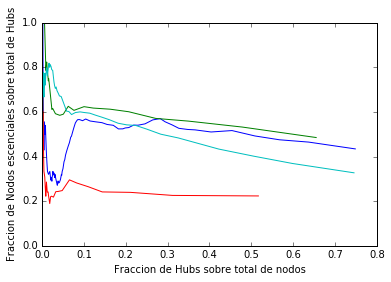

In [78]:
#2) Grafico 3
def asignar_esencialidad(data):
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    #data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    N=g.number_of_nodes()
    
    k=[]
    for node in g.nodes:
        k.append(g.degree(node))
    
    kM = max(k)
    
    nodos=[]
          
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        nodos.append([node,'no escencial'])
        h=nodos.index([node,'no escencial'])
        for j in range(len(escen)):

            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nodos[h][1]='escencial'
        
    frac_Hubs_total = []
    frac_Escen_Hubs = []
    for k in range(1,kM):#defino el kcutoff
        contadorH = 0
        contadorE = 0
        for node in nodos:
            #K_cutoff.append(0)
            if g.degree(node[0]) > k:
                contadorH = contadorH + 1
                if node[1] == 'escencial':
                    contadorE = contadorE + 1
                    
        frac_Hubs_total.append(contadorH/N)
        
        frac_Escen_Hubs.append(contadorE/contadorH)

    #print(frac_Hubs_total)
    #print(frac_Escen_Hubs)
    plt.plot(frac_Hubs_total,frac_Escen_Hubs)
    plt.xlabel('Fraccion de Hubs sobre total de nodos')
    plt.ylabel('Fraccion de Nodos escenciales sobre total de Hubs')


asignar_esencialidad(APP)
asignar_esencialidad(LITT)
asignar_esencialidad(Y2HH)
asignar_esencialidad(LIT_REGULYYY)

plt.show()


#dataAPP = asignar_esencialidad(APP)
#dataLIT = asignar_esencialidad(LITT)
#dataY2HH = asignar_esencialidad(Y2HH)
#dataLITREG = asignar_esencialidad(LIT_REGULYYY)

In [72]:
#CELL DE PRUEBA
def asignar_esencialidad(data):
    escen = ldata ('tc02Data/Essential_ORFs_paperHe.txt')
    #data=ldata(archive)
    g = nx.Graph ()
    g = g.to_undirected()

    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    N=g.number_of_nodes()
    
    k=[]
    for node in g.nodes:
        k.append(g.degree(node))
    
    kM = max(k)
    
    nodos=[]
          
    for node in g.nodes():
        g.node[node]['escencialidad']='no escencial'
        nodos.append([node,'no escencial'])
        h=nodos.index([node,'no escencial'])
        for j in range(len(escen)):
            
            if len(escen[j]) > 2 and node in escen[j][1]: #No me interesan las listas con largo menor a 2
                g.node[node]['escencialidad']='escencial'
                nodos[h][1]='escencial'

                
    ll=len(list(g.nodes()))
    lll=len(nodos)
    N
    es=len(escen)
    
    return [ll,lll,N,es]

asignar_esencialidad(APP)


[1622, 1622, 1622, 1162]